# k-Nearest Neighbors

In [2]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load data
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
y = iris["target"] # three different types of plants
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
X = iris["data"][:,2:]

Split the data into test and training sets:

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

# Stratify option here tells python we want to keep the same ratios in test
# and training set by label
X_train,X_test,y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1, stratify=y)

Must scale the features, since Euclidean distances are used in kNN and  relative distances are affected if features on different scales

In [6]:
# Feature scaling, generally necessary for kNN
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

Train the classifier with $k=3$ using the standard Eucliean $L^2$ distance metric

In [7]:
classifier = KNeighborsClassifier(n_neighbors=3) # start with k=3, using L^2 norm, dont't need last two args since those are defaults
classifier.fit(X_train_sc,y_train)

KNeighborsClassifier(n_neighbors=3)

Predict the classes of the data in the test set:

In [8]:
y_pred =  classifier.predict(X_test_sc)
y_pred

array([2, 0, 1, 0, 0, 0, 2, 2, 2, 1, 0, 1, 2, 1, 2, 0, 2, 1, 1, 2, 1, 1,
       0, 0, 2, 2, 0, 0, 1, 1])

The **confusion matrix** has entries $C_{i,j}$ such that $C_{i,j}$ is equal to the number of observations known to be in class $i$ and predicted to be in class $j$

In [9]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  0, 10]])

In [10]:
print(accuracy_score(y_test,y_pred))

1.0


Pretty high accuracy! Now let's see a plot with the unscaled data (source: [sklearn kNN example](https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py)); for this particular dataset, the difference in measurements is not so large that the data requires scaling, but for real datasets it is required to scale your features.

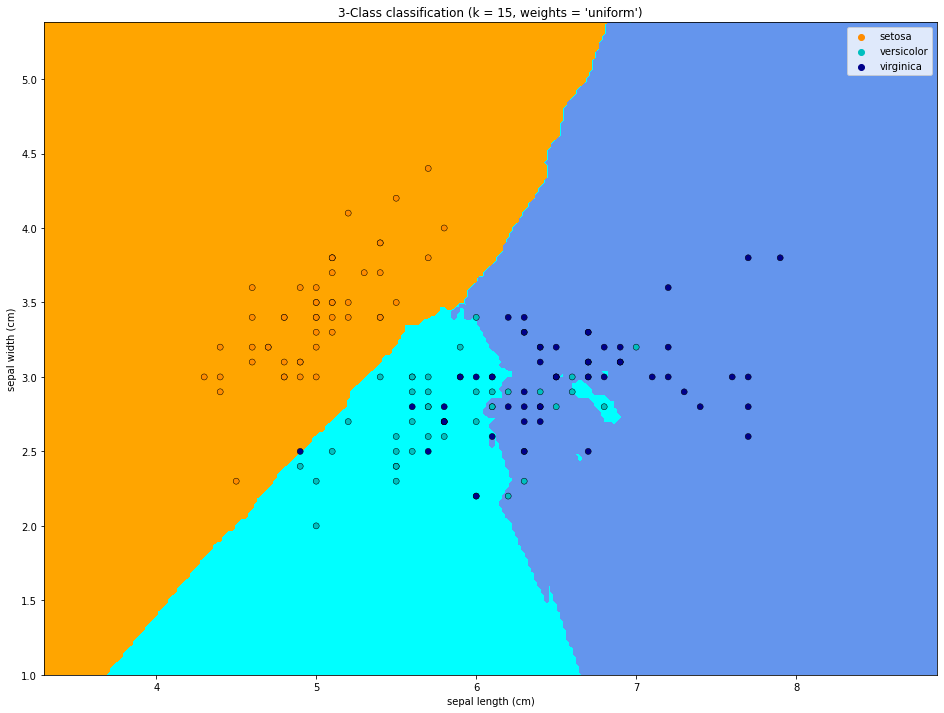

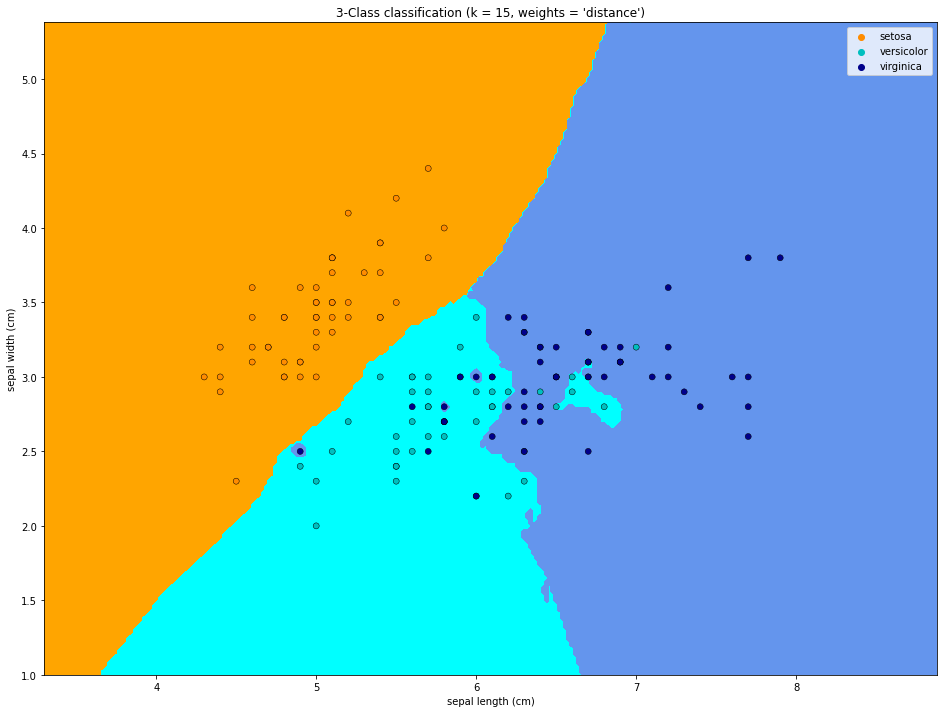

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 15

# Similar to before, not splitting into test/train just for visualization
X = iris.data[:, :2]
y = iris.target

h = 0.02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ["darkorange", "c", "darkblue"]

for weights in ["uniform", "distance"]:
    # Fit data
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. Need to use a meshgrid here:
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(16,12))
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    # Scatterplot of training data
    sns.scatterplot(
        x=X[:, 0],
        y=X[:, 1],
        hue=iris.target_names[y],
        palette=cmap_bold,
        alpha=1.0,
        edgecolor="black",
    )
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights))
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])

plt.show()

In [12]:
X_train,X_test,y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1, stratify=y)

accuracy = []

for i in [3,5,7,9,11,13,15,17,19,21]:
  classifier = KNeighborsClassifier(n_neighbors=i,p=2,metric='euclidean') # start with k=3, using L^2 norm
  classifier.fit(X_train_sc,y_train)
  y_pred =  classifier.predict(X_test_sc)
  accuracy.append(accuracy_score(y_test,y_pred))

accuracy

[1.0,
 1.0,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667]

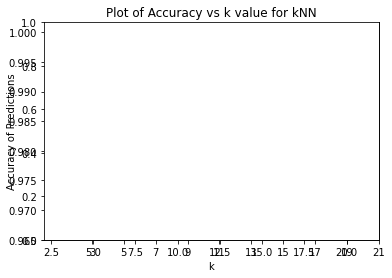

In [13]:
plt.plot([3,5,7,9,11,13,15,17,19,21],accuracy,"r-")
ax = plt.axes()
ax.set_xticks([3,5,7,9,11,13,15,17,19,21])
plt.xlabel("k")
plt.ylabel("Accuracy of Predictions")
plt.title("Plot of Accuracy vs k value for kNN")
plt.show()

# k-NN on Wine Dataset (see [UCI Wine Dataset](https://archive.ics.uci.edu/ml/datasets/wine)), 13 features and 3 classes (different types of wine)


First we see what happens without feature scaling:

In [14]:
X = datasets.load_wine()["data"]
y = datasets.load_wine()["target"]

X_train,X_test,y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1, stratify=y)

accuracy = []

for i in [3,5,7,9,11,13,15,17,19,21]:
  classifier = KNeighborsClassifier(n_neighbors=i,p=2,metric='euclidean') # start with k=3, using L^2 norm
  classifier.fit(X_train,y_train)
  y_pred =  classifier.predict(X_test)
  accuracy.append(accuracy_score(y_test,y_pred))

accuracy

[0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6944444444444444,
 0.6944444444444444,
 0.6944444444444444,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666]

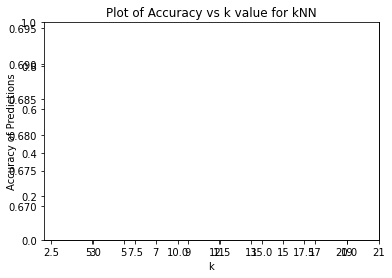

In [15]:
plt.plot([3,5,7,9,11,13,15,17,19,21],accuracy,"r-")
ax = plt.axes()
ax.set_xticks([3,5,7,9,11,13,15,17,19,21])
plt.xlabel("k")
plt.ylabel("Accuracy of Predictions")
plt.title("Plot of Accuracy vs k value for kNN")
plt.show()

Maximum accuracy is not very high here...let's see if feature scaling helps.

In [16]:
X_train_sc = sc_X.fit_transform(X_train)
X_test_sc = sc_X.transform(X_test)

accuracy = []

for i in [3,5,7,9,11,13,15,17,19,21]:
  classifier = KNeighborsClassifier(n_neighbors=i,p=2,metric='euclidean') # start with k=3, using L^2 norm
  classifier.fit(X_train_sc,y_train)
  y_pred =  classifier.predict(X_test_sc)
  accuracy.append(accuracy_score(y_test,y_pred))

accuracy

NameError: name 'sc_X' is not defined

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


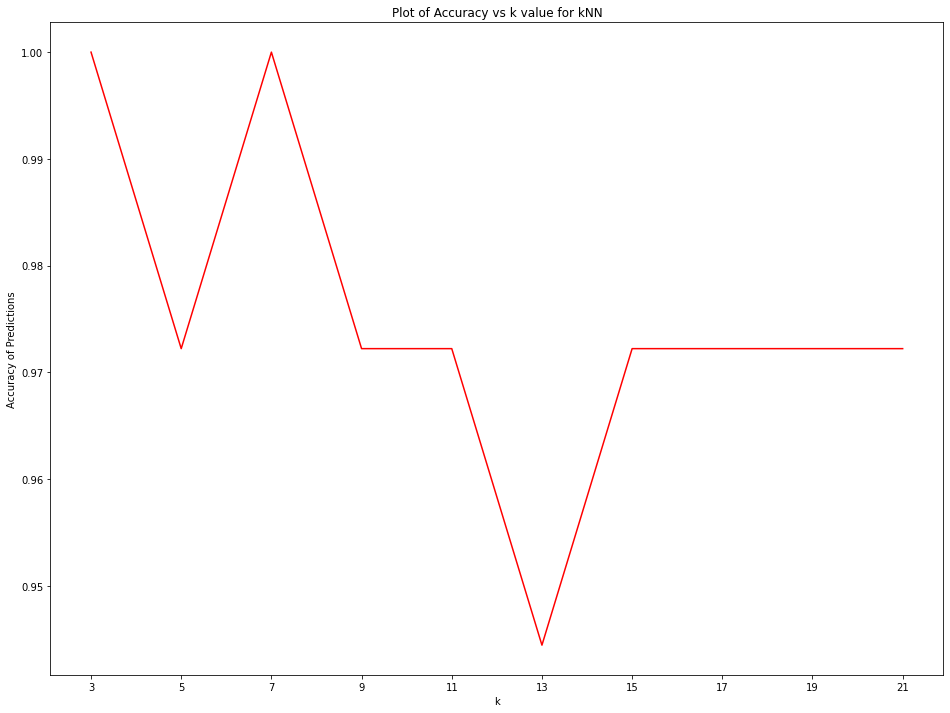

In [ ]:
plt.plot([3,5,7,9,11,13,15,17,19,21],accuracy,"r-")
ax = plt.axes()
ax.set_xticks([3,5,7,9,11,13,15,17,19,21])
plt.xlabel("k")
plt.ylabel("Accuracy of Predictions")
plt.title("Plot of Accuracy vs k value for kNN")
plt.show()

Much better accuracy! We would want to take the largest value of $k$ that achieves the highest accuracy, since smaller values of $k$ result in complex decision boundaries (i.e. overfitting the training data)

# Logistic Regression

In [ ]:
from sklearn import datasets

iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [ ]:
X = iris["data"][:,3:] # petal width
y = (iris["target"] == 2).astype(int) # 1 if Iris-Virginica, else 0

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

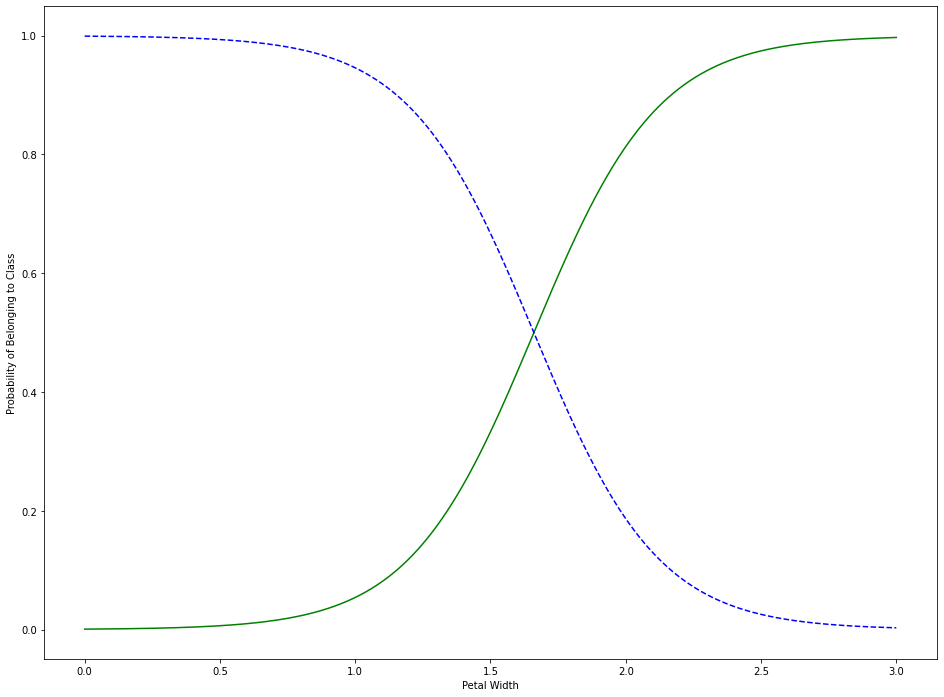

In [ ]:
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new,y_proba[:,1],"g-",label="Iris-Virginica")
plt.plot(X_new,y_proba[:,0],"b--",label="Not Iris-Virginica")
plt.xlabel("Petal Width")
plt.ylabel("Probability of Belonging to Class")
plt.show()

The "decision boundary" is where these functions cross; to the left of that the corresponding petal width predicts Not Iris-Virginica, to the right it predicts Iris-Virginica.

# Logistic Regression with Multiple Features

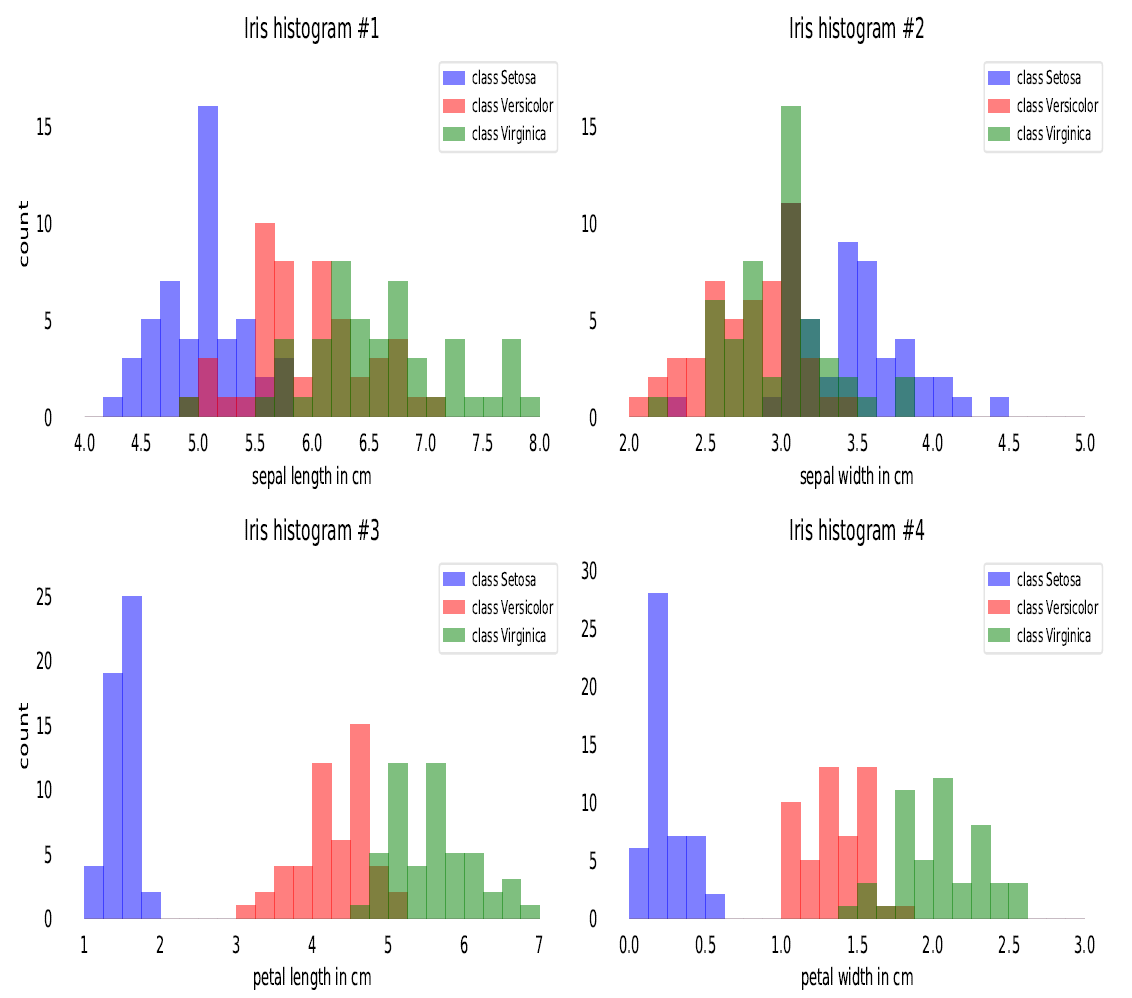